1. Use the stochastic integral (N = 100) to simulate and plot a path of (a) the Ornstein-Uhlenbeck process $dXt$ = $−θXt+σdWt$ with X(0) = 10, θ = 5, and σ = 3.5, (b)

the Cox-Ingersoll-Ross process, $θ$ = (2.00, 0.20, 0.15),

(c) the Black-Scholes-Merton process, $θ$ = (1.0, 0.2).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, exp
import random
from scipy.stats import norm


In [ ]:
N = 100

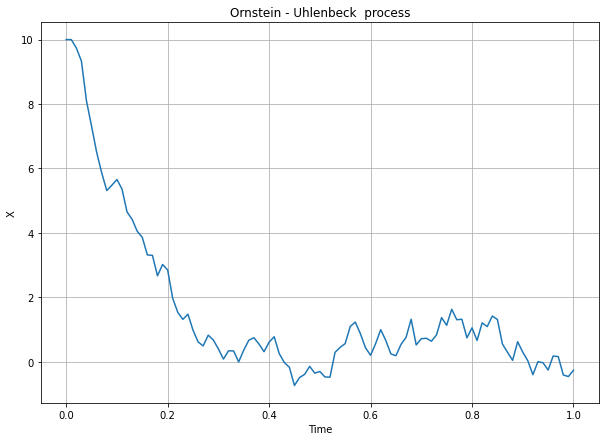

In [ ]:
def BM () :
  W =[]
  T =1
  W += [0]
  Delta = T / N
  X =[ i / N for i in range (N+1)]
  for i in range (1, len(X)) :
    W +=[W[i -1]+ np.random.normal(0, 1, 1) * sqrt(Delta) ]
  return W

W = BM ()
t =[i / N for i in range (N+1) ]
x = 10
theta = 5
sigma = 3.5

X = [0 for i in range ( N ) ]
X [0]= x
ito_sum =[ exp ( - theta *( t [ i ] - t [i -1]) ) *(W [i] - W [i -1]) for i in range (1,N ) ]
X = [ X [0]* exp ( - theta * t [ i ]) + sigma *sum(ito_sum [0: i ]) for i in range (N) ]
#xt = µ + (x0 − µ)e−θt + σинтеграл (t0) e−θ(t−u)dWu.

X = [ X [0]]+ X

plt . figure ( figsize =(10, 7) )
plt . grid ()
plt . plot (t , X, label='func')
plt . title ("Ornstein - Uhlenbeck  process")
plt.xlabel ("Time")
plt.ylabel ("X")
plt.show ()

the Cox-Ingersoll-Ross process,  θ  = (2.00, 0.20, 0.15),

In [ ]:
N =100
theta1 = 2.00
theta2 = 0.20
theta3 = 0.15

In [ ]:
def CIR2(X, theta, beta, sigma, dt):
    DX = theta * (beta - X) * dt + sigma * np.sqrt(X) * np.random.normal(0, np.sqrt(dt))
    return DX

<ipython-input-47-f9c5b80931fd>:2: RuntimeWarning: invalid value encountered in sqrt
  DX = theta * (beta - X) * dt + sigma * np.sqrt(X) * np.random.normal(0, np.sqrt(dt))


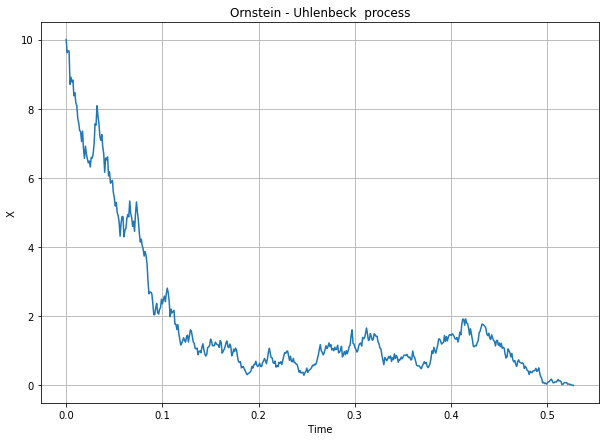

In [ ]:
theta1 = 1
theta2 = 2
theta3 = 0.3
N = 1000
T = 1
t = np.linspace(0,T,N)

X = np.zeros(N)
X[0] = 10
theta = 5
sigma = 3.5
beta = 1.1
for i in range(1, len(X)):
    X[i] = X[i - 1] + CIR2(X[i - 1], theta, beta, sigma, 1 / N)
plt.figure ( figsize =(10, 7) )
plt.grid ()
plt.plot (t, X )
plt.title ("Ornstein - Uhlenbeck  process")
plt.xlabel (" Time ")
plt.ylabel ("X")
plt.show ()

 the Black-Scholes-Merton process,  θ  = (1.0, 0.2).
 

In [ ]:
N =100
theta1 = 1.0
theta2 = 0.8
#Xt = x0e^(θ1−θ2^2/2)t+θ2Wt


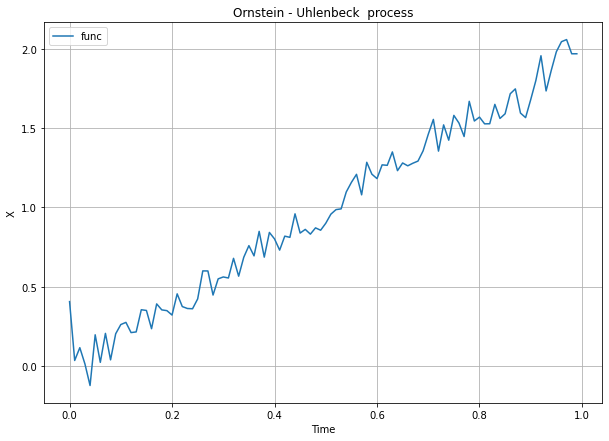

In [ ]:
def BM () :
  W =[]
  T =1
  W +=[0]
  Delta = T / N
  X =[ i /N for i in range (N+1) ]
  for i in range (1,len( X ) ) :
    W +=[W[i -1]+ np.random.normal (0, 1) * sqrt ( Delta )]
  return W

W = BM ()


t =[ i /N for i in range (N) ]
x =1

X = [0 for i in range ( N ) ]
X [0]= x

#ito_sum =[ exp ( theta2 *(t [ i ] - t [i -1] ) * (sqrt(X[i-1])) * ( W [ i ] - W [i -1])) for i in range (1,N ) ]
X = [(X [0] *exp(theta1 - (theta2**2 / 2)) * t [ i ]) + theta2 * ( W [ i ] - W [i -1]) for i in range ( N ) ]


plt.figure(figsize =(10, 7))
plt.grid ()
plt.plot(t , X, label='func')
plt.title("Ornstein - Uhlenbeck  process")
plt.xlabel("Time")
plt.ylabel("X")
plt.legend()
plt.show ()



Задача 2
. Read the Section 2.5 [7] and compute a confidence interval of the CIR
process from the previous item. Plot the path and a confidence interval.$k = 4α/σ^2$ ,
$ζ =\frac{σ^2(1−e^{β(t−s)})}{4β}$
and non-centrality parameter $λ =(4βe^β(t−s)x(s))/(σ2(1−e^β(t−s))

$vlower(s, t) = ζ(k + λ − ξ\sqrt{2(k + 2λ)})$
$vupper(s, t) = ζ(k + λ + ξ(\sqrt(2(k + 2λ)))$
 $ξ = F^{−1}_{N(0,1)}(1-\alpha/2)$



In [ ]:
def p_k(alpha, sigma):
    return (4 * alpha) / (sigma ** 2)

In [ ]:
def p_z(t, s, N, sigma, beta):
    return (sigma ** 2) * (1 - np.exp(-beta * (t / N - s / N))) / (4 * beta)

In [ ]:
def p_lambda(t, s, N, x, sigma, beta):
    return 4 * beta * np.exp(-beta * (t / N - s / N)) * x / (sigma ** 2 * (1 - np.exp(-beta * (t / N - s / N))))

In [ ]:
def p_xi(a):
    return norm.ppf(1 - a/2)

In [ ]:
def v_lower(k, z, lambda1, xi):
    return z * (k + lambda1 - xi * np.sqrt(2 * (k + 2 * lambda1)))

In [ ]:
def v_upper(k, z, lambda1, xi):
    return z * (k + lambda1 + xi * np.sqrt(2 * (k + 2 * lambda1)))

In [ ]:
def CIR2(X, theta, beta, sigma, dt):
    DX = theta * (beta - X) * dt + sigma * np.sqrt(X) * np.random.normal(0, np.sqrt(dt))
    return DX

In [ ]:
N = 100
X = np.zeros((100, N))
theta = 0.2
sigma = 0.2
beta = 0.2
for j in range(0, 100):
    X[j][0] = 5
    for i in range(1, N):
        X[j][i] = X[j][i - 1] + CIR2(X[j][i - 1], theta, beta, sigma, 1 / N)

In [ ]:
zv_lower = np.zeros(N)
zv_upper = np.zeros(N)
zv_lower[0] = X[0][0] = 5
zv_upper[0] = X[0][0] = 5

k = p_k(theta, sigma)
xi = p_xi(0.02)

for i in range(1, N):
    z = p_z(i, 0, N, sigma, beta)
    lambda1 = p_lambda(i, 0, N, 5, sigma, beta)
    zv_lower[i] = v_lower(k, z, lambda1, xi)
    zv_upper[i] = v_upper(k, z, lambda1, xi)

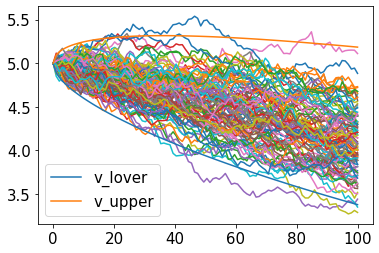

In [ ]:
fig, ax = plt.subplots()
for j in range(100):
    plt.plot(np.linspace(0, N, N), X[j])
plt.plot(np.linspace(0, N, N), zv_lower, label="v_lover")
plt.plot(np.linspace(0, N, N), zv_upper, label="v_upper")
plt.legend()
plt.show()

In [ ]:
Задача 3

For the Ornstein-Uhlenbeck process
d$Xt = θ(µ − Xt)dt + σdWt, θ = 1, µ = 1.2, σ = 0.3$
generate three paths: $X0 = 0.0, 2.0, N (µ, σ^2/2θ)$
and plot in graph. Define
a path with the stationary distribution from the graph.

In [ ]:
def O_U(X, theta, mu, sigma, dt):
    dX = theta * (mu - X) * dt + sigma * np.random.normal(0, np.sqrt(dt))
    return dX

In [ ]:
N = 100
theta = 1.0
mu = 1.2
sigma = 0.3
t = np.linspace(0, N, N)

In [ ]:
X1 = np.zeros(N)
X2 = np.zeros(N)
X3 = np.zeros(N)

X1[0] = 0.0
X2[0] = 2.0
X3[0] = np.random.normal(mu, (sigma ** 2) / 2 * theta)
for i in range(1, len(X)):
    X1[i] = X1[i - 1] + O_U(X1[i - 1], theta, mu, sigma, 1 / N)
    X2[i] = X2[i - 1] + O_U(X2[i - 1], theta, mu, sigma, 1 / N)
    X3[i] = X3[i - 1] + O_U(X3[i - 1], theta, mu, sigma, 1 / N)

Text(0, 0.5, 'X')

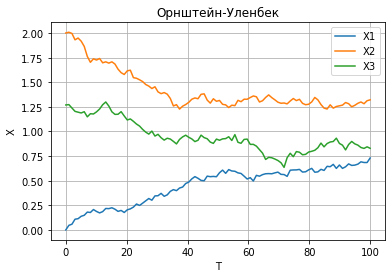

In [ ]:
fig, ax = plt.subplots()
plt.plot(np.linspace(0, N, N), X1, label = 'X1')
plt.plot(np.linspace(0, N, N), X2, label = 'X2')
plt.plot(np.linspace(0, N, N), X3, label = 'X3')
plt.grid()
plt.legend()
plt.title('Орнштейн-Уленбек')
plt.xlabel('T')
plt.ylabel('X')

4.Design a process that stays in the interval [0, 1] and mean-reverts around 1/2, generate and plot in graph.

In [ ]:
def O_U(X, theta, mu, sigma, dt):
    dX = theta * (mu - X) * dt + sigma * np.random.normal(0, np.sqrt(dt))
    return dX

In [ ]:
N = 1000
theta = 1000
mu = 0.5
sigma = 0.1
t = np.linspace(0, N, N)

In [ ]:
X3 = np.zeros(N)

X3[0] = 0.5
for i in range(1, len(X3)):
    X3[i] = X3[i - 1] + O_U(X3[i - 1], theta, mu, sigma, 1 / N)

Text(0.5, 1.0, 'New Process')

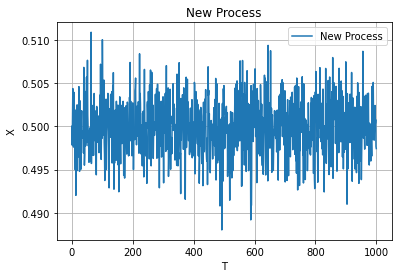

In [ ]:
plt.plot(t, X3, label='New Process')
plt.grid()
plt.legend()
plt.xlabel('T')
plt.ylabel('X')
plt.title('New Process')

Ornstein – Uhlenbeck process is a mean-reverting process, which is described by the SDE $$ dX_t = α(μ-X_t)dt+σdW_t$$
where \\(α > 0\\) and \\(W_t\\) is the Wiener process. It can easily be solved explicitly: $$X_t = e^{-αt}X_0+μ(1-e^{-αt})+∫_{0}^{t}σe^{α(s-t)}dW_s $$ 
So we deduce that $$ EX_t = e^{-αt}X_0 + μ(1-e^{-αt}) = \mu +σ(1), t \ → ∞ $$

$$ X_t =\frac{σ^2}{2α}\Big(1-e^{-2αt}\Big) = \frac{σ^2}{2α}, t \ → ∞$$

The coefficient \\(α\\) is called the speed of mean reversion.
Half-life of the mean-reversion, \\(t_{1/2}\\), is the average time it will take the process to get pulled half-way back to the mean. To this end, we consider the ODE $$ dx = α (μ − x), $$
which has the solution $$ x(t) = μ+e^{−αt(x_0−μ)}.$$
So we can find the half-time from the equation
$$x(t_{1/2}) −μ = \frac{x_0 - μ}{2}, $$
i. e. \\(t_{1/2} =\frac{log2}{α}\\).
In particular, the higher the mean-reversion speed is, the smaller is the half-life.

In [ ]:
N = 100
T = 1
Delta = T / N
x = 10
theta = 2
sigma = 3.5

In [ ]:
def BM () :
  W =[]
  T =1
  W += [0]
  Delta = T / N
  X =[ i / N for i in range (N+1)]
  for i in range (1, len(X)) :
    W +=[W[i -1]+ np.random.normal(0, 1, 1) * sqrt(Delta) ]
  return W

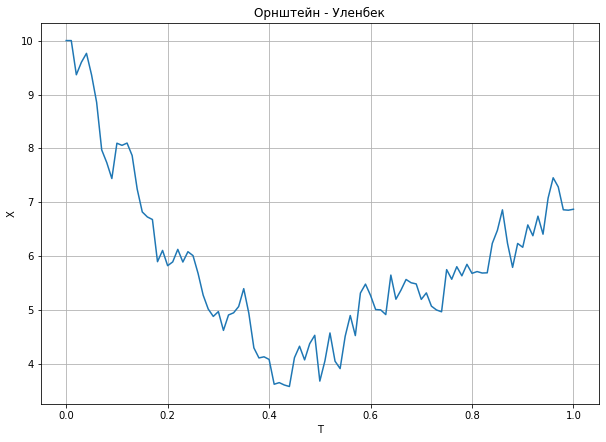

t =  0.34657359027997264


In [ ]:

W = BM()
t = [i/N for i in range (N+1)]
X = [0 for i in range (N)]
X [0] = x
ito_sum = [np.exp(-theta * (t[i] - t[i-1])) * (W[i] - W[i-1]) for i in range(1,N)]
X = [X[0] * np.exp(-theta * t[i]) + sigma * sum(ito_sum[0: i]) for i in range(N)] 
X = [X[0]] + X

plt.figure (figsize=(10, 7))
plt.grid()
plt.plot(t, X)
plt.title('Орнштейн - Уленбек')
plt.xlabel('T')
plt.ylabel('X')
plt.show()

t = np.log(2)/theta
print('t = ', t)

In [ ]:
def BM () :
  W =[]
  T =1
  W += [0]
  Delta = T / N
  X =[ i / N for i in range (N+1)]
  for i in range (1, len(X)) :
    W +=[W[i -1]+ np.random.normal(0, 1, 1) * np.sqrt(Delta) ]
  return W

In [ ]:
def BM(N, T):
    W = np.zeros(N)  
    Delta = T / N
       
    for i in range (1, N):
        W[i] += W[i-1] + np.random.normal(0, np.sqrt(Delta))
    return W

In [ ]:
def SBM(mu, sigma, t, W):
    return np.exp((mu - (sigma**2)/2)*t + sigma * W)

In [ ]:
def GBM(S, mu, sigma, dt, dW):
    dS = mu * S * dt + sigma * S * dW
    return dS

In [ ]:
def M_GBM(S, mu, sigma, dt, dW):
    dS = mu * S * dt + sigma * S * dW + (sigma**2) * S * ((dW**2) - dt) / 2
    return dS

In [ ]:
N = [i for i in range(10000, 410000, 10000)]
T = 1
mu = 1
sigma = 0.2
alpha = 0.33
eta   = 0.25
errorE, errorM = np.zeros(len(N)), np.zeros(len(N))
j = 0

In [ ]:
for n in N:
    W  = BM(n, T)
    dW = 0
    t, dt = np.linspace(0, T, n, retstep=True)
    SE_gbm = np.zeros(n)
    SM_gbm = np.zeros(n)
    S_SBM = np.zeros(n) 
    I = np.zeros(n)
    #s_sbm = 10
    SE_gbm[0] = 10
    SM_gbm[0] = 10
    S_SBM[0] = 10
    #S_SBM1 = s_sbm * SBM(1, 0.2, t[i-1], W[i-1])
    #S_SBM[i]   = S_SBM[0] * SBM(1, 0.2, t[i], W[i -1])
    
    
   
    for i in range(1, n):
        dW = W[i] - W[i-1]
        #I = np.zeros(n)
        S_SBM[i] = S_SBM[0] * SBM(mu, sigma, t[i], W[i-1])
        SE_gbm[i] = SE_gbm[i-1] + GBM(SE_gbm[i-1], 1, 0.2, dt, dW)
        SM_gbm[i]  = SM_gbm[i-1] + M_GBM(SM_gbm[i-1], 1, 0.2, dt, dW)
        errorE[j] +=(S_SBM[i] - SE_gbm[i])**2
        errorM[j] += (S_SBM[i] - SM_gbm[i])**2
        #I[j] = abs(errorE[j] - ErrorM[j])
    errorE[j] /= n
    errorM[j] /= n
    I[j] = abs(errorE[j] - errorM[j])
    j += 1

In [ ]:
print(max(I))

1.9495299113810965e-07


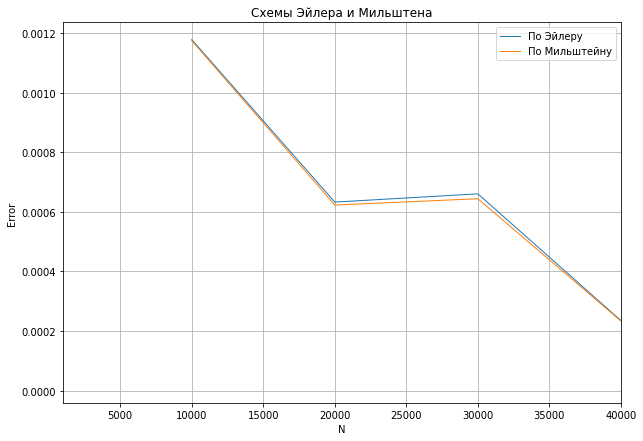

In [ ]:

plt.figure ( figsize =(10, 7) )
plt.grid ()

plt.plot (N, errorE, linewidth =1.0, label='По Эйлеру')
plt.plot (N, errorM, linewidth =1.0, label='По Мильштейну')


plt.title ("Схемы Эйлера и Мильштена")
plt.xlabel ('N')
plt.ylabel ('Error')
plt.xlim(1000, 40000)
#plt.ylim(0,0.01)
plt.legend()
plt.show ()